<a href="https://colab.research.google.com/github/naokityokoyama/Machine_Learning/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
sns.set_style('whitegrid')
%matplotlib inline

As Features do Dataset

*    PassangerID - ID do passageiro
*    Survived - Se o passageiro sobreviveu 1 ou não 0
*    Pclass - Qual a classe do passageiro (1, 2 ,3)
*    Sex - Sexo do passageiro
*    SibSp - Numero de irmãos ou esposas no navio
*    Parch - Numero de pais ou filhos dentro do navio
*    Ticket - Numero do Ticket
*    Fare - Tarifa paga pelo passageiro
*    Cabin - Numero da cabine
*    Embarked - Porto onde o passageiro embarcou


In [2]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## taxa de sobrivencia 

In [3]:
total= (len(df_train))
sobreviventes= (len(df_train[df_train['Survived']==1]))

print ('a taxa de sobrevivencia foi de ', round(sobreviventes/total, 3)*100,'%')

a taxa de sobrevivencia foi de  38.4 %


## Alguns Graficos 


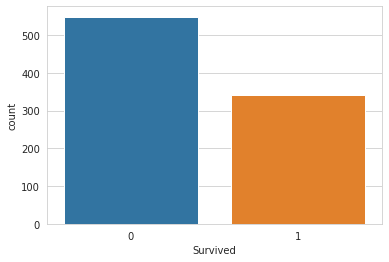

In [5]:
sns.countplot(x='Survived', data=df_train)

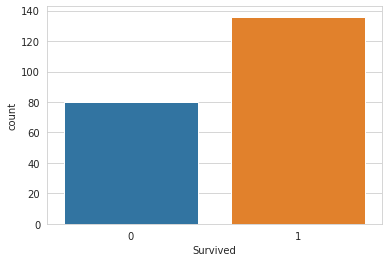

In [6]:
sns.countplot(x='Survived', data=df_train[df_train.Pclass==1])

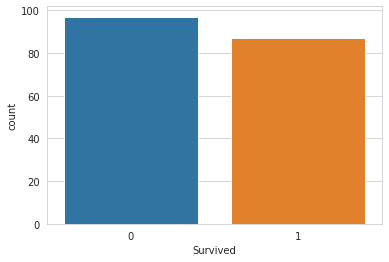

In [7]:
sns.countplot(x='Survived', data=df_train[df_train.Pclass==2])

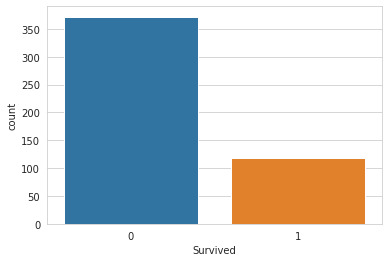

In [8]:
sns.countplot(x='Survived', data=df_train[df_train.Pclass==3])

## Dados NaN

In [9]:
df_train.columns.values

for coluna in df_train.columns.values:
  print (coluna, df_train[coluna].isnull().sum())

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [69]:
df_test.columns.values

for coluna in df_test.columns.values:
  print (coluna, df_test[coluna].isnull().sum())

PassengerId 0
Pclass 0
Name 0
Sex 0
Age 86
SibSp 0
Parch 0
Ticket 0
Fare 1
Cabin 327
Embarked 0


## Retirando dado nulo da varavel 'Embarked'

In [190]:
df_train.loc[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [4]:
#apenas 2 NaN no 'Embarked' entao foi colocado não embarcou 0 
df_train.loc[df_train['Embarked'].isnull(), 'Embarked']=0
df_test.loc[df_test['Embarked'].isnull(), 'Embarked']=0

## Drop na cabin

In [5]:
#cabine não diz muito coisa então fazermos um drop

df_train = df_train.drop('Cabin', axis=1)
df_test = df_test.drop('Cabin', axis=1)

In [16]:
#idade
df_train.loc[df_train['Age'].isnull()] [df_train['SibSp']> 0] [df_train['Parch']> 0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,C
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,C
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,S
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,S


## Media das idades male, female das 3 categorias 

In [48]:
#media da idade Homem e mulher classe 3
print ('A media idade dos homens da classe 3', df_train.loc[df_train['Sex']=='male'][df_train['Pclass']==3]['Age'].median())
print ('A media idade dos mulheres da classe 3',df_train.loc[df_train['Sex']=='female'][df_train['Pclass']==3]['Age'].median())

#media da idade Homem e mulher classe 2
print ('A media idade dos homens da classe 2',df_train.loc[df_train['Sex']=='male'][df_train['Pclass']==2]['Age'].median())
print ('A media idade dos mulheres da classe 2',df_train.loc[df_train['Sex']=='female'][df_train['Pclass']==2]['Age'].median())

#media da idade Homem e mulher classe 1
print ('A media idade dos homens da classe 1',df_train.loc[df_train['Sex']=='male'][df_train['Pclass']==1]['Age'].median())
print ('A media idade dos mulheres da classe 1',df_train.loc[df_train['Sex']=='female'][df_train['Pclass']==1]['Age'].median())

A media idade dos homens da classe 3 25.0
A media idade dos mulheres da classe 3 21.0
A media idade dos homens da classe 2 30.0
A media idade dos mulheres da classe 2 28.0
A media idade dos homens da classe 1 40.0
A media idade dos mulheres da classe 1 35.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  #

In [49]:
#criando o filtro para mudar o NaN pelas medias de idade 
df_train['Age'].loc[(df_train['Age'].isnull())&(df_train['Sex']=='male')&(df_train['Pclass']==3)] =25

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [6]:
#aplicando a media na classe 3 
df_train['Age'].loc[(df_train['Age'].isnull())&(df_train['Sex']=='male')&(df_train['Pclass']==3)] =25
df_test['Age'].loc[(df_test['Age'].isnull())&(df_test['Sex']=='male')&(df_test['Pclass']==3)] =25

df_train['Age'].loc[(df_train['Age'].isnull())&(df_train['Sex']=='female')&(df_train['Pclass']==3)] =21
df_test['Age'].loc[(df_test['Age'].isnull())&(df_test['Sex']=='female')&(df_test['Pclass']==3)] =21

#aplicando a media na classe 2
df_train['Age'].loc[(df_train['Age'].isnull())&(df_train['Sex']=='male')&(df_train['Pclass']==2)] =30
df_test['Age'].loc[(df_test['Age'].isnull())&(df_test['Sex']=='male')&(df_test['Pclass']==2)] =30

df_train['Age'].loc[(df_train['Age'].isnull())&(df_train['Sex']=='female')&(df_train['Pclass']==2)] =28
df_test['Age'].loc[(df_test['Age'].isnull())&(df_test['Sex']=='female')&(df_test['Pclass']==2)] =28

#aplicando a media na classe 1
df_train['Age'].loc[(df_train['Age'].isnull())&(df_train['Sex']=='male')&(df_train['Pclass']==1)] =40
df_test['Age'].loc[(df_test['Age'].isnull())&(df_test['Sex']=='male')&(df_test['Pclass']==1)] =40

df_train['Age'].loc[(df_train['Age'].isnull())&(df_train['Sex']=='female')&(df_train['Pclass']==1)] =35
df_test['Age'].loc[(df_test['Age'].isnull())&(df_test['Sex']=='female')&(df_test['Pclass']==1)] =35

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [208]:
len(df_test['Age'].loc[df_test['Age'].isnull()])

0

In [209]:
len(df_train['Age'].loc[df_train['Age'].isnull()])

0

In [195]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [76]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [7]:
#colocando valor 0 no Fare no unico NaN do test
df_test.loc[df_test['Fare'].isnull(), 'Fare']=0

## Criando uma nova Feature

www.regexr.com


In [128]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [9]:
for df in (df_train, df_test):
  df['Title'] = df['Name'].str.extract('([A-Za-z]+\.)')

df_test.Title

0          Mr.
1         Mrs.
2          Mr.
3          Mr.
4         Mrs.
        ...   
413        Mr.
414      Dona.
415        Mr.
416        Mr.
417    Master.
Name: Title, Length: 418, dtype: object

In [130]:
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt.,0,1
Col.,0,2
Countess.,1,0
Don.,0,1
Dr.,1,6
Jonkheer.,0,1
Lady.,1,0
Major.,0,2
Master.,0,40


In [10]:
pd.crosstab(df_test['Title'], df_test['Sex'])

Sex,female,male
Title,,
Col.,0,2
Dona.,1,0
Dr.,0,1
Master.,0,21
Miss.,78,0
Mr.,0,240
Mrs.,72,0
Ms.,1,0
Rev.,0,2


In [11]:
#agrupando os Title para reduzir 

for df in (df_train, df_test):
  df['Title'] = df['Title'].replace(['Lady.', 'Capt.','Sir.', 'Col.', 'Countess.', 'Don.', 'Dr.', 'Jonkheer.' ,'Dona.',  'Major.', 'Rev.'],'Rare') 
  
  df['Title'] = df['Title'].replace(['Mlle.', 'Ms.'],'Miss') 
  df['Title'] = df['Title'].replace('Mme.','Mrs') 

  df['Title'] = df['Title'].replace('Miss.','Miss') 
  df['Title'] = df['Title'].replace('Master.','Master') 
  df['Title'] = df['Title'].replace('Mr.','Mr') 
  df['Title'] = df['Title'].replace('Mrs.','Mrs') 

In [403]:
#retirando 1 numero do Ticket para padronizar o final
df_train['Ticket'] = df_train['Ticket'].apply(lambda x: x[:-1])

In [83]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.0,1,2,W./C. 6607,23.4500,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


In [12]:
#aplicando um map no Title

trocar = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5	}

df_train['Title'] = df_train['Title'].map(trocar)
df_test['Title'] = df_test['Title'].map(trocar)

In [13]:
#family size (SibSP + Parch)

df_train['Family_size'] = df_train['SibSp'] + df_train['Parch'] + 1 
df_test['Family_size'] = df_test['SibSp'] + df_test['Parch'] + 1  # esse +1 seria a propria pessoa

#criando uma variavel vazia está sozinho
df_train['Is_alone'] = 0
df_test['Is_alone'] = 0

#criando um filtro se a familia tiver tamanho 1 siginifica sozinho (2 formas de fazer o filtro)
df_train.loc[df_train['Family_size'] ==1 , 'Is_alone'] = 1
df_test['Is_alone'].loc[df_test['Family_size']==1] =1


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [134]:
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family_size,Is_alone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1.0,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,3.0,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1.0,1,1


In [214]:
#Imposto pago para entrar no navio (Fare) 

df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [14]:
for df in (df_train, df_test):
  df['FareCat'] = 0  #criada com valor 0 mas é opcional essa criação pois embaixo já vai ser criado de qualquer forma
  df.loc[df['Fare']< 7.91, 'FareCat']=1
  df.loc[(df['Fare']>=7.91) & (df['Fare']< 14.45), 'FareCat']=2
  df.loc[(df['Fare']>=14.45) & (df['Fare']< 31), 'FareCat']=3
  df.loc[df['Fare']>=31, 'FareCat']=4

In [158]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family_size,Is_alone,FareCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3,2,0,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3,2,0,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,1,2


In [15]:
#Embarked

trocar_embark = {'S':1, 'C': 2, 'Q':3, 0:0}

for df in (df_train, df_test):
  df['Embarked'] = df['Embarked'].map(trocar_embark)

In [16]:
#retirar o nome e o ticket

df_train = df_train.drop(['Name', 'Ticket'], axis=1)
df_test = df_test.drop(['Name', 'Ticket'], axis=1)

In [218]:
df_train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size,Is_alone,FareCat
0,1,0,3,male,22.0,1,0,7.2500,1,1,2,0,1
1,2,1,1,female,38.0,1,0,71.2833,2,3,2,0,4
2,3,1,3,female,26.0,0,0,7.9250,1,2,1,1,2


In [17]:
#Sex
trocar_sex = {'male':0, 'female': 1}

for df in (df_train, df_test):
  df['Sex'] = df['Sex'].map(trocar_sex)

In [21]:
#revisao geral 

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Title        891 non-null    int64  
 10  Family_size  891 non-null    int64  
 11  Is_alone     891 non-null    int64  
 12  FareCat      891 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 90.6 KB


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Title        418 non-null    int64  
 9   Family_size  418 non-null    int64  
 10  Is_alone     418 non-null    int64  
 11  FareCat      418 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 39.3 KB


## Machine Learning

In [18]:
X_train = df_train.drop(['Survived'], axis=1)
y_train = df_train['Survived']

X_test = df_test

In [27]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
y_pred = RF.predict(X_test)
RF.score(X_train, y_train)



0.9988776655443322

In [53]:
df_train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size,Is_alone,FareCat
0,1,0,3,0,22.0,1,0,7.2500,1,1,2,0,1
1,2,1,1,1,38.0,1,0,71.2833,2,3,2,0,4
2,3,1,3,1,26.0,0,0,7.9250,1,2,1,1,2
3,4,1,1,1,35.0,1,0,53.1000,1,3,2,0,4
4,5,0,3,0,35.0,0,0,8.0500,1,1,1,1,2


In [52]:
RF.predict(X_train.iloc[0:5,:])

array([0, 1, 1, 1, 0])

In [ ]:
#note que fzemos previsão das 5 primeiras pessoas e ele acertou todas